## Where do embeddings come from?

### Embedding of MNIST images

Notwendige Pakete: Scikit Learn und Tensorflow

In [6]:
%pip install tensorflow
%pip install scipy

     ---------------------------------------- 3.0/3.0 MB 6.3 MB/s eta 0:00:00
     -------------------------------------- 105.4/105.4 kB 3.1 MB/s eta 0:00:00
     ------------------------------------- 181.2/181.2 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 85.3/85.3 kB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import losses
from scipy.stats import norm

MNIST ist bereits als Datensatz in Keras verfügbar. Wir laden die Bilder herunter und skalieren die Werte.

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

So sehen die Bilder aus:

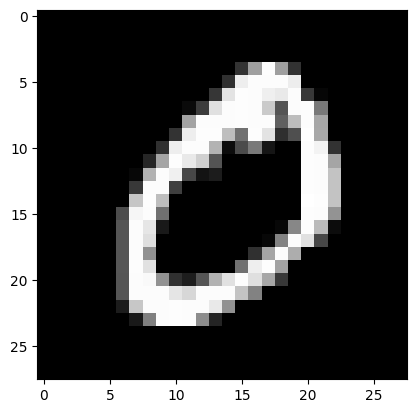

In [25]:
# Example of a training image
plt.imshow(X_train[1]);

Wir wandeln die zweidimensionalen Bilder in Vektoren der Länge 28x28=784 um.

In [26]:
X_train = X_train.reshape((len(X_train)), np.prod(X_train.shape[1:]))
X_test = X_test.reshape((len(X_test)), np.prod(X_test.shape[1:]))

Für später legen wir uns Bilder beiseite, die nur Beispiele einer bestimmten Ziffer zeigen.

In [27]:
only_zero = X_train[y_train == 0]
only_four = X_train[y_train == 4]

Aufbau unseres Neuronalen Netzes: ein simpler Autoencoder

In [12]:
encoding_dim = 36

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784, )))
model.add(Dense(encoding_dim, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

Der Autoencoder wird trainiert: er soll die Trainingsdaten aus den Trainingsdaten möglichst gut vorhersagen.

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, 
          X_train,
          epochs=10,
          batch_size=256,
          shuffle=True,
          validation_data=(X_test, X_test)
          )

Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0904 - val_loss: 0.0880
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0888 - val_loss: 0.0876
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0882 - val_loss: 0.0868
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0876 - val_loss: 0.0865
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0870 - val_loss: 0.0858
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0865 - val_loss: 0.0853
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0860 - val_loss: 0.0849
Epoch 8/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0857 - val_loss: 0.0846
Epoch 9/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0852 - val_loss: 0.0842
Epoch 10/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0848 - val_loss: 0.0840

Der Autoencoder wird angewendet: er bekommt die Testdaten als Input und wir speichern den Output.

In [29]:
reconstructed_imgs = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


Wir geben den Output als Bild aus - die Rekonstruktion sieht garnicht so schlecht aus!

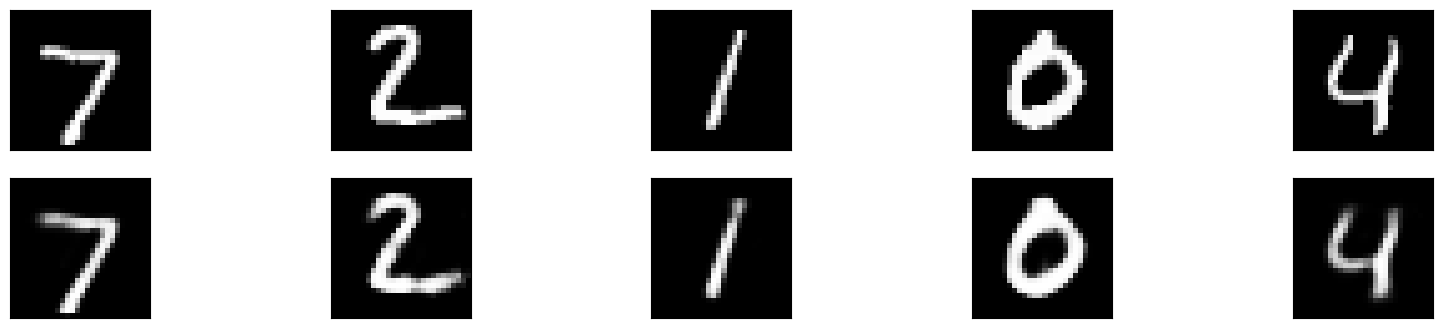

In [30]:
n = 5
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Wir visualisieren die Embeddings, indem wir den Encoder aus dem Modell extrahieren:

In [31]:
from keras.models import Sequential
from keras.layers import Dense

encoder = Sequential()
for layer in model.layers[:2]:
    encoder.add(layer)

# encoder.summary()

Eine einfache Funktion, um die Bilder und ihre latente Darstellung zu drucken:

In [32]:
def plot_stuff(images, latent_images):
    n = 15
    plt.figure(figsize=(15, 3))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(latent_images[i].reshape(6, 6))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


313/313 [==============================] - 0s 1ms/step


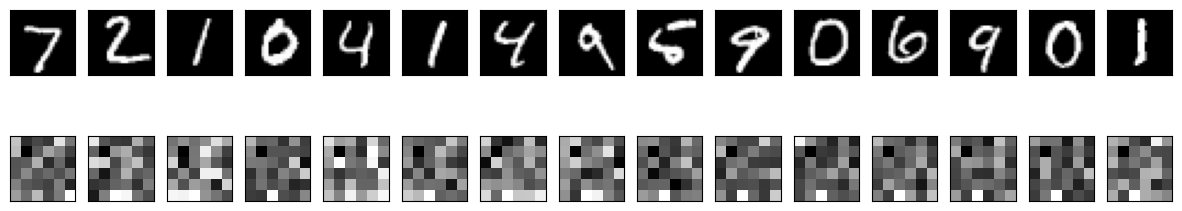

In [33]:
latent_images = encoder.predict(X_test)
plot_stuff(X_test, latent_images)

Wir geben Beispiele nur für Nullen aus:

  1/186 [..............................] - ETA: 5s

183/183 [==============================] - 0s 1ms/step


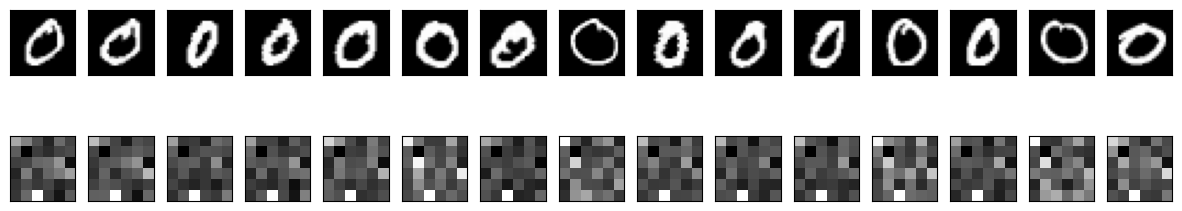

In [34]:
latent_zeros = encoder.predict(only_zero)
plot_stuff(only_zero, latent_zeros)

Im Vergleich dazu: wir geben Beispiele nur für Vieren aus:

183/183 [==============================] - 0s 2ms/step


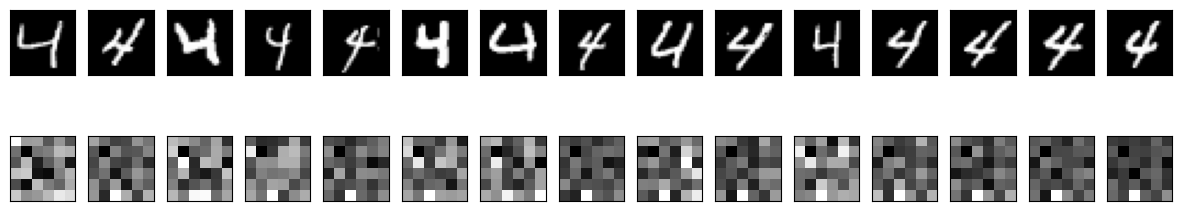

In [35]:
latent_fours = encoder.predict(only_four)
plot_stuff(only_four, latent_fours)